In [69]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv("job-market(2).csv")

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40789 entries, 0 to 40788
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10099 non-null  float64
 1   Title              10099 non-null  object 
 2   Company            9483 non-null   object 
 3   Date               10099 non-null  object 
 4   Location           10099 non-null  object 
 5   Area               6392 non-null   object 
 6   Classification     10099 non-null  object 
 7   SubClassification  10099 non-null  object 
 8   Requirement        10099 non-null  object 
 9   FullDescription    9843 non-null   object 
 10  LowestSalary       10099 non-null  float64
 11  HighestSalary      10099 non-null  float64
 12  JobType            9852 non-null   object 
dtypes: float64(3), object(10)
memory usage: 4.0+ MB
None


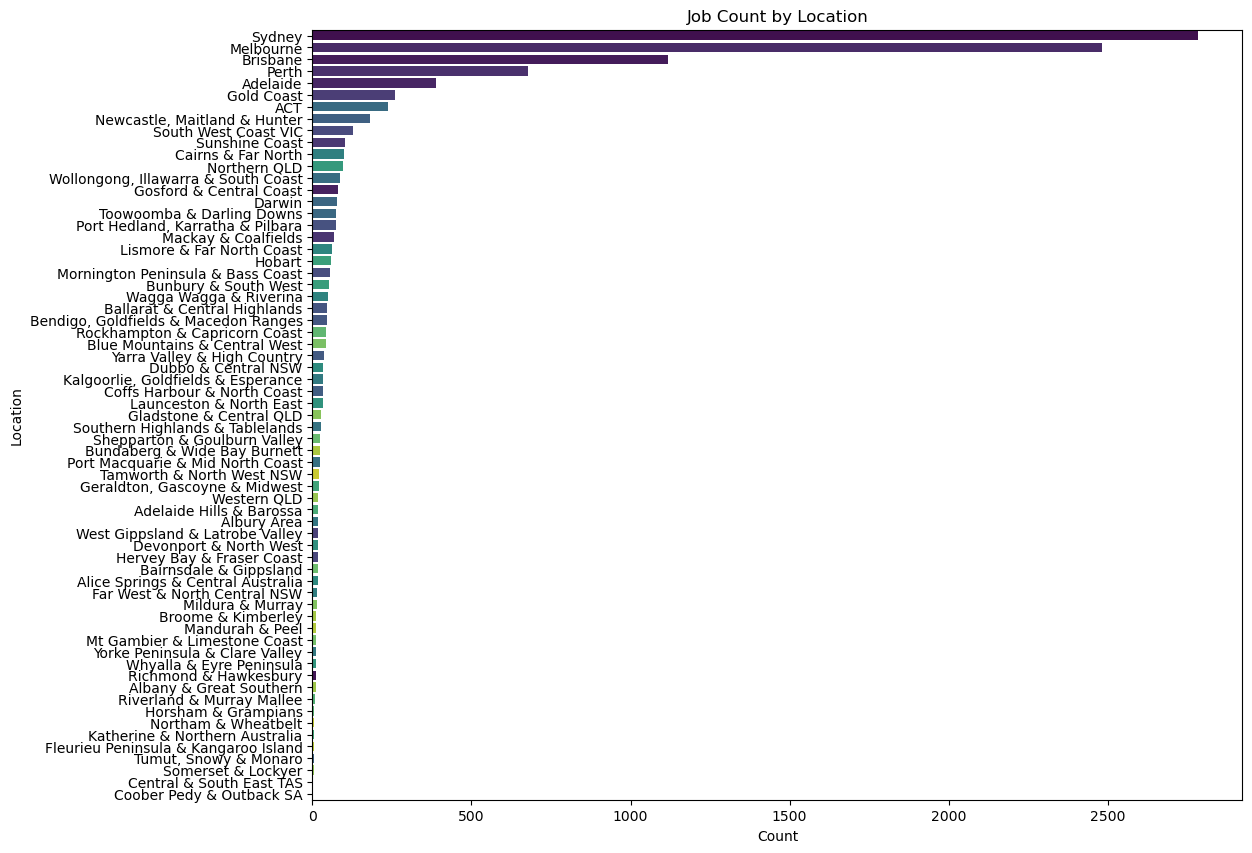

In [25]:
plt.figure(figsize=(12, 10))
sns.countplot(y=df['Location'], order=df['Location'].value_counts().index, hue=df['Location'], palette="viridis", legend=False)
plt.title("Job Count by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

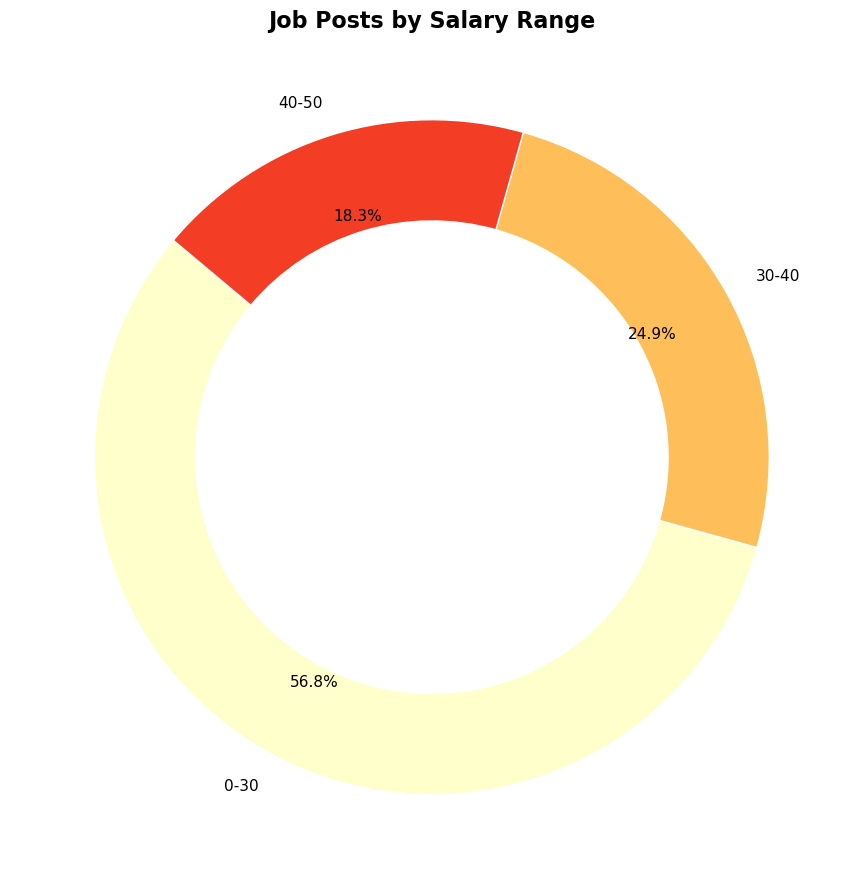

In [41]:
df = pd.read_csv("job-market(2).csv")
df = df.dropna(subset=['LowestSalary']).copy()

bins = [0, 30, 40, 50, 60, 70, 80, 100, 120, 150, 200, 999]
labels = ["0-30", "30-40", "40-50", "50-60", "60-70", "70-80", 
          "80-100", "100-120", "120-150", "150-200", "200-999"]

df.loc[:, 'SalaryRange'] = pd.cut(df['LowestSalary'], bins=bins, labels=labels, include_lowest=True)

salary_counts = df['SalaryRange'].value_counts().sort_index()
salary_counts = salary_counts[salary_counts > 0]

colors = plt.cm.YlOrRd(range(0, 256, int(256 / len(salary_counts))))

plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    salary_counts,
    labels=salary_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='white'),
    textprops=dict(color="black", fontsize=11),
    pctdistance=0.75
)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Job Posts by Salary Range", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


In [75]:
df = pd.read_csv("wine.data.csv", header=None)
labels = df.iloc[:, 0]
df = df.drop(columns=[0])
df.head()

1           2     3                  4          5              6   \
0  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols   
1    14.23        1.71  2.43               15.6        127            2.8   
2     13.2        1.78  2.14               11.2        100           2.65   
3    13.16        2.36  2.67               18.6        101            2.8   
4    14.37        1.95   2.5               16.8        113           3.85   

           7                     8                9                10    11  \
0  Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue   
1        3.06                  0.28             2.29             5.64  1.04   
2        2.76                  0.26             1.28             4.38  1.05   
3        3.24                   0.3             2.81             5.68  1.03   
4        3.49                  0.24             2.18              7.8  0.86   

      12       13  
0  OD280  Proline  
1   3.92     1065  
2    3.4     1050  
3   3.17     1185  
4   3.45     1480

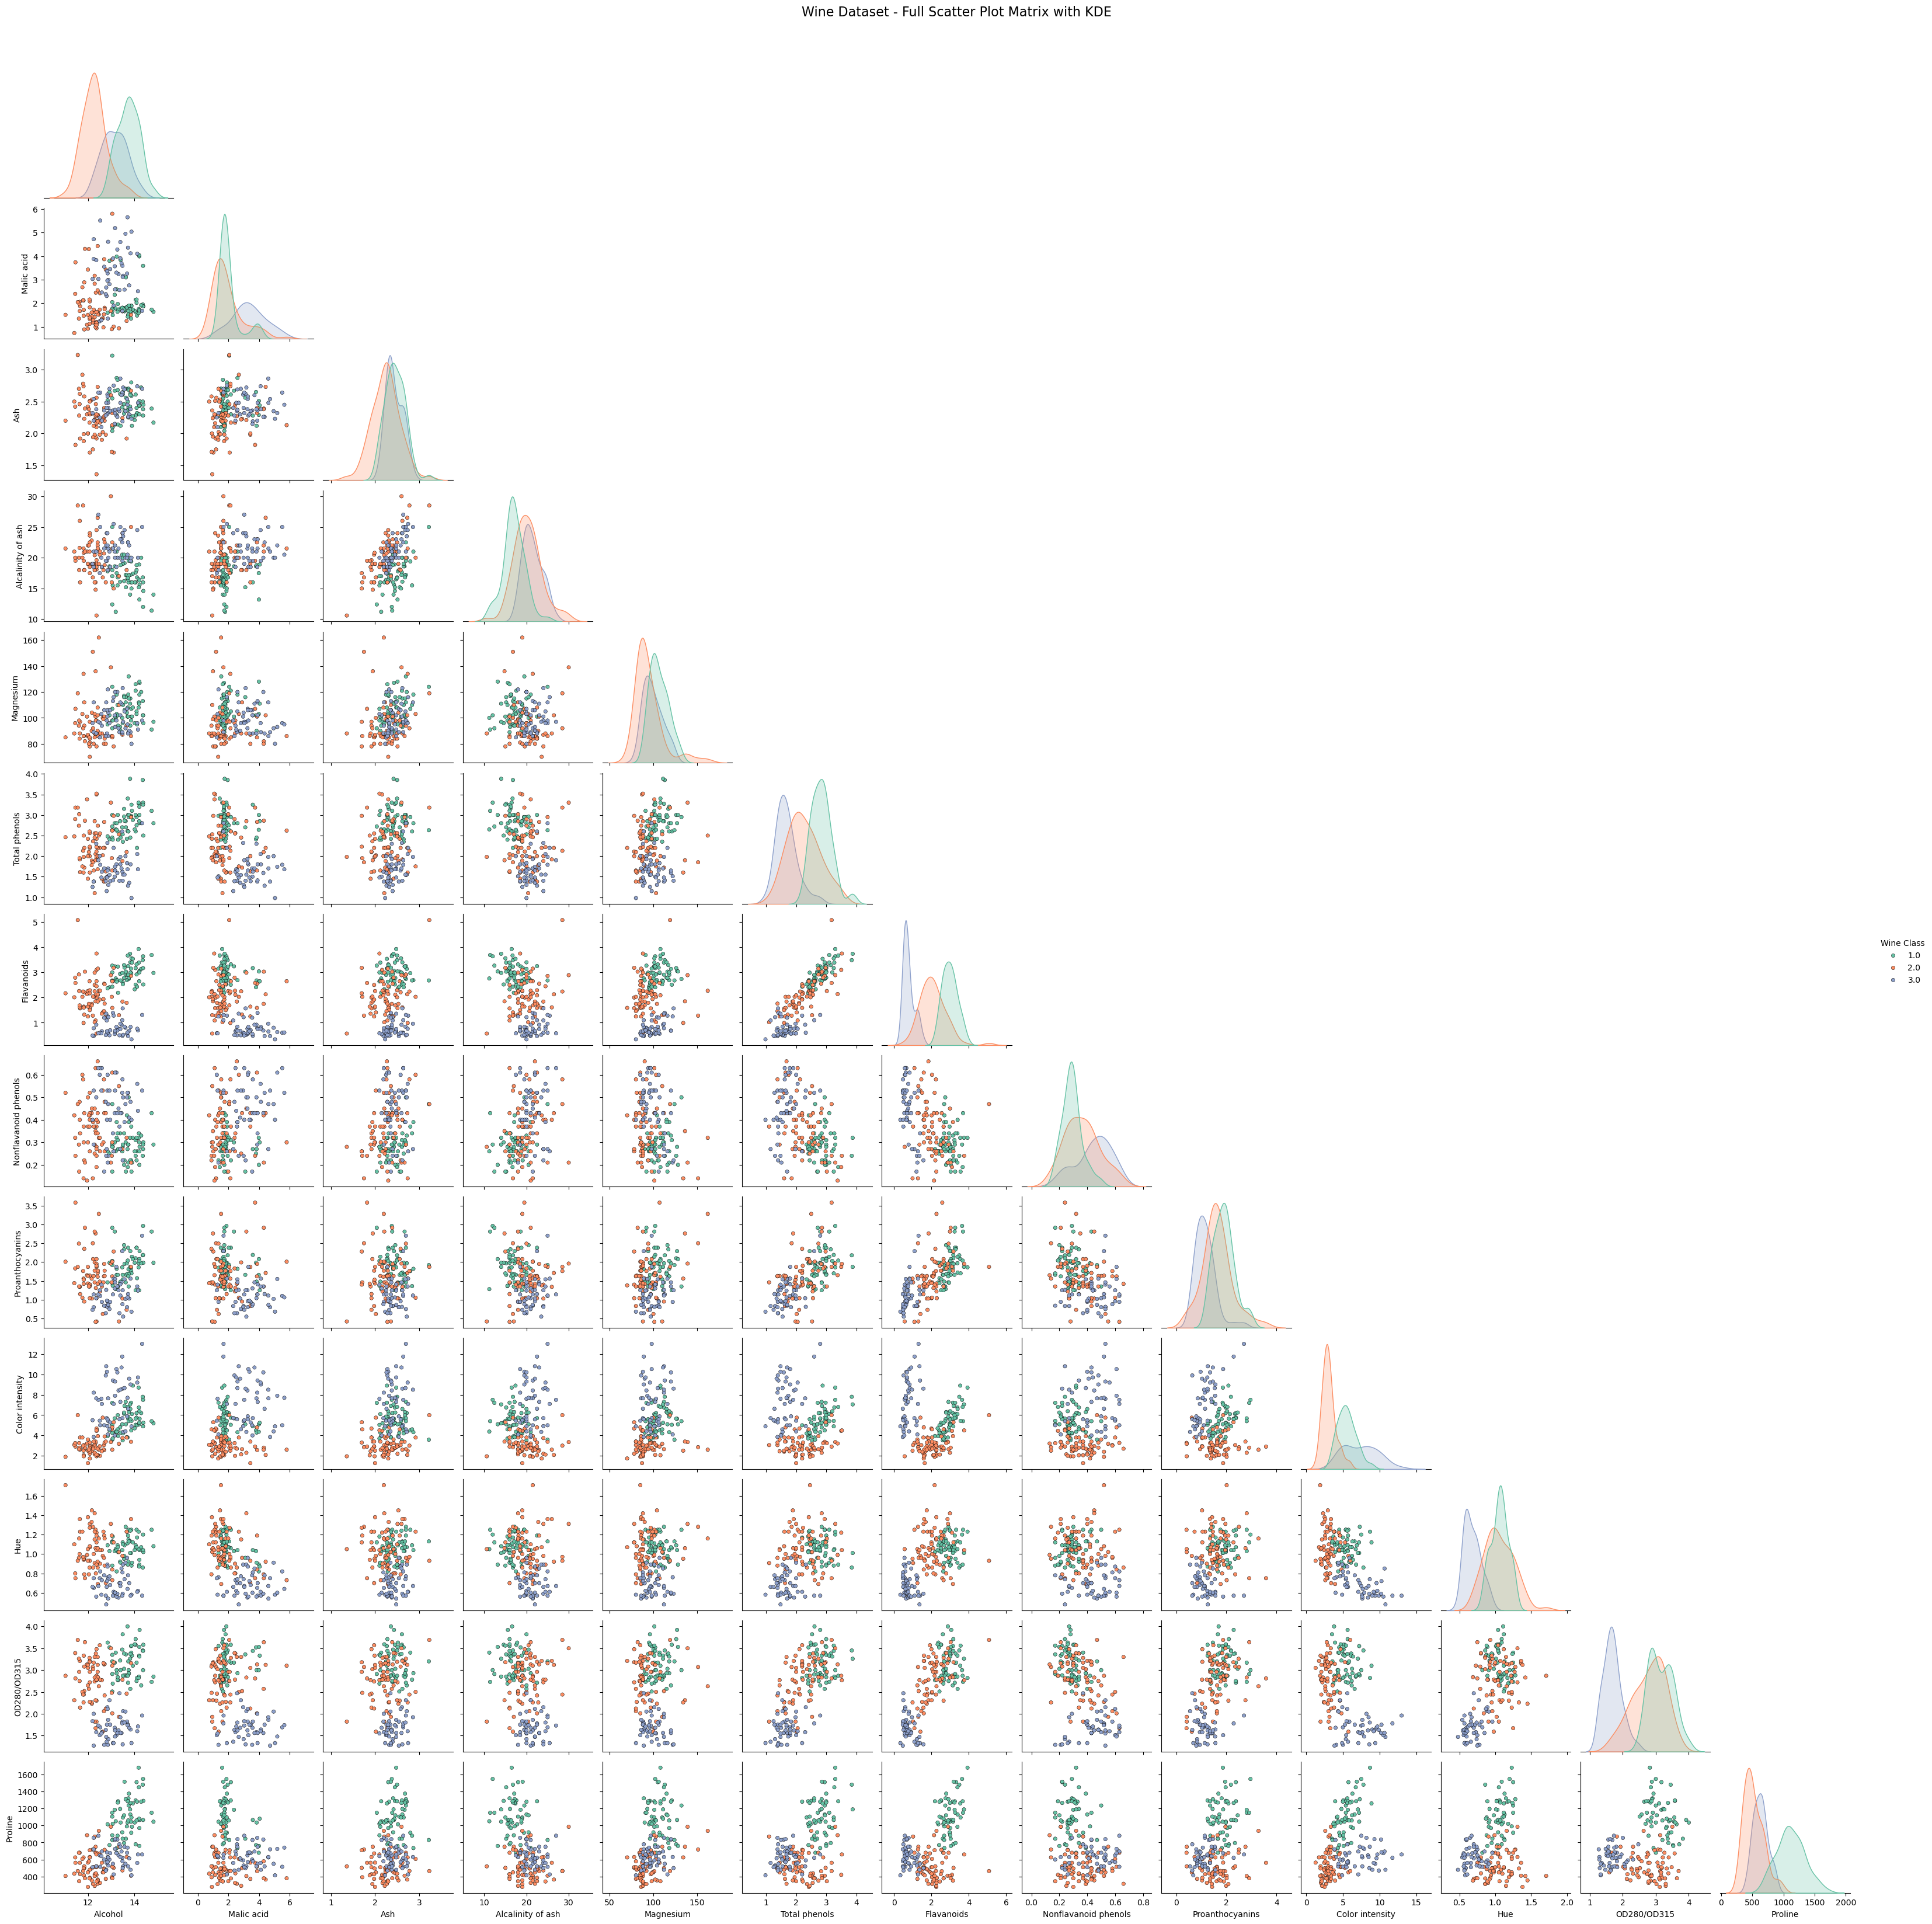

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("wine.data.csv", header=None)

# Separate class labels and feature data
labels = df.iloc[:, 0]
df = df.drop(columns=[0])

df.columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

df['Wine Class'] = labels

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

feature_cols = df.select_dtypes(include='number').columns[df.columns != 'Wine Class']

sns.pairplot(df, vars=feature_cols, hue='Wine Class', palette='Set2',
             diag_kind='kde', corner=True, plot_kws={'s': 20, 'edgecolor': 'k'})

plt.suptitle("Wine Dataset - Full Scatter Plot Matrix with KDE", y=1.02, fontsize=16)
plt.show()


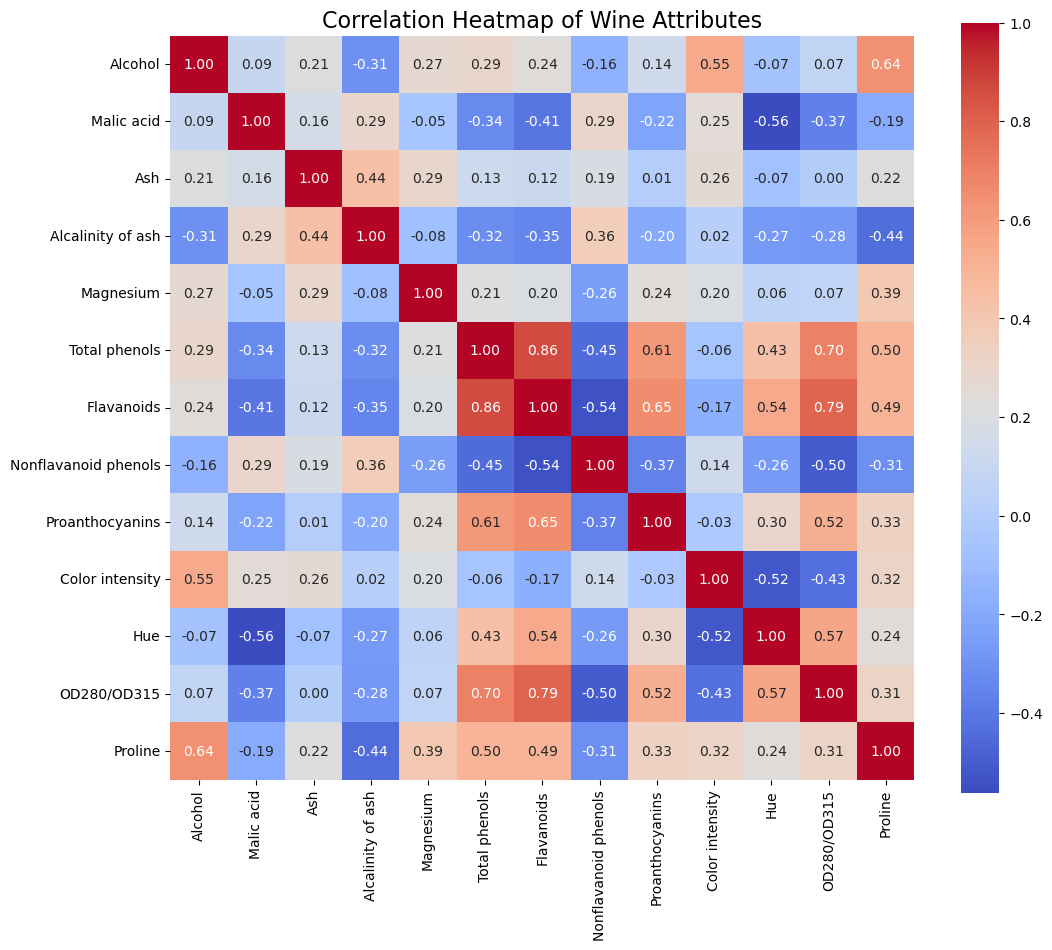

In [83]:
# Drop class column for correlation matrix
wine_features = df.drop(columns=["Wine Class"])
corr_matrix = wine_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Wine Attributes", fontsize=16)
plt.show()

In [85]:
# Unstack the matrix to find top correlations
corr_unstacked = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlations (1.0 on the diagonal)
top_corr_pairs = corr_unstacked[corr_unstacked < 1].drop_duplicates().head(3)

print("Top 3 most correlated attribute pairs:")
print(top_corr_pairs)


Top 3 most correlated attribute pairs:
Total phenols  Flavanoids       0.864564
OD280/OD315    Flavanoids       0.787194
               Total phenols    0.699949
dtype: float64


C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


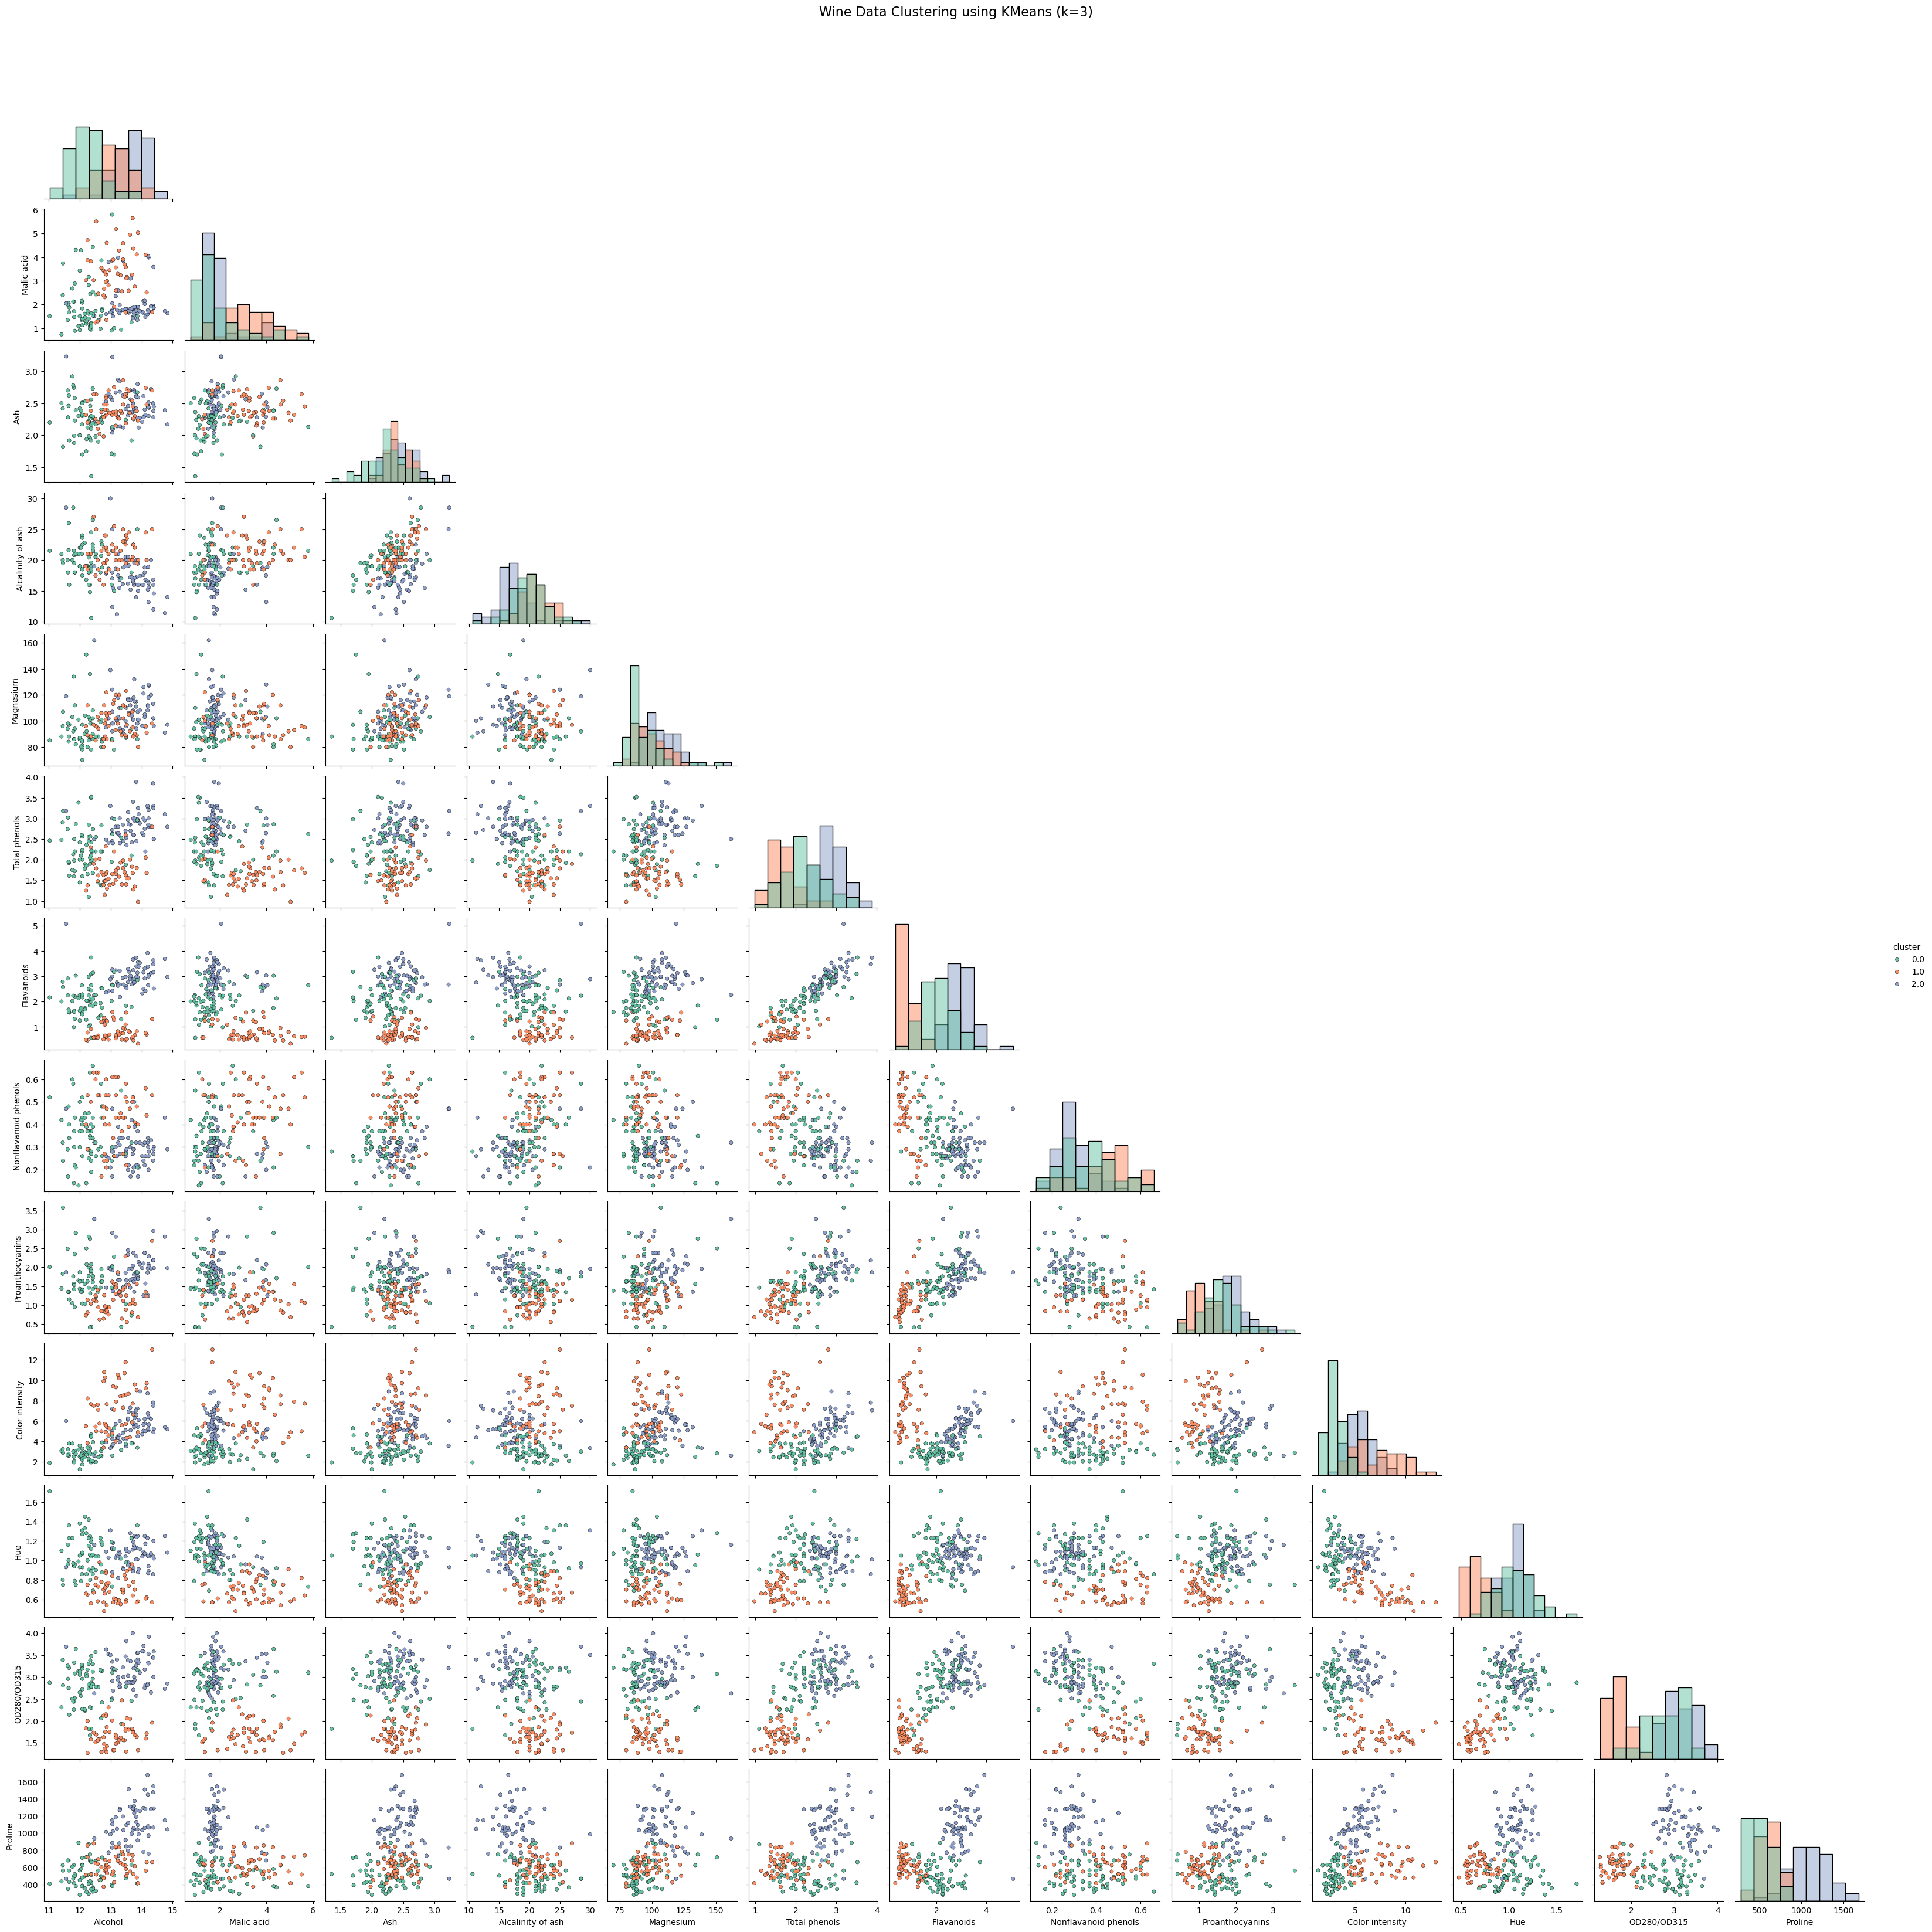

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wine_features = df.drop(columns=["Wine Class", "cluster"], errors="ignore")
# Ensure all values are numeric
wine_features = wine_features.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
wine_features = wine_features.dropna()

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
label_pred_KM = kmeans.fit_predict(wine_scaled)

wine_for_plot = wine_features.copy()
wine_for_plot['cluster'] = label_pred_KM.astype('float64')

sns_plot = sns.pairplot(wine_for_plot, hue="cluster", diag_kind="hist",
                        palette="Set2", plot_kws={'s': 20, 'edgecolor': 'k'}, corner=True)
plt.suptitle("Wine Data Clustering using KMeans (k=3)", y=1.02, fontsize=16)
plt.show()


In [93]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import numpy as np

df = pd.read_csv("wine.data.csv", header=None)

# Assign column names
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

df = df.apply(pd.to_numeric, errors='coerce')  # Convert all to numbers, replace bad values with NaN
df = df.dropna()  # Drop any rows that still contain NaN

labels = df['Class']
wine = df.drop(columns=['Class'])
standardScaler = preprocessing.StandardScaler()
X_scaled_array = standardScaler.fit_transform(wine)
normalizedData = pd.DataFrame(X_scaled_array, columns=wine.columns)

kmeans_orig = KMeans(n_clusters=3, random_state=0)
label_pred_KM = kmeans_orig.fit_predict(normalizedData)

pca = PCA(n_components=6)
X_pca = pca.fit_transform(normalizedData)
print("Explained variance by first 6 PCs:", round(np.sum(pca.explained_variance_ratio_), 4))

kmeans_pca = KMeans(n_clusters=3, random_state=0)
label_pred_KM_PCA = kmeans_pca.fit_predict(X_pca)

ari_original = adjusted_rand_score(labels, label_pred_KM)
ari_pca = adjusted_rand_score(labels, label_pred_KM_PCA)

print("Adjusted Rand Index (Original KMeans):", round(ari_original, 4))
print("Adjusted Rand Index (KMeans after PCA):", round(ari_pca, 4))


Explained variance by first 6 PCs: 0.851
Adjusted Rand Index (Original KMeans): 0.8975
Adjusted Rand Index (KMeans after PCA): 0.8975


C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
